In [1]:
%cd ..

c:\Projects\Groningen-Waste-Collection


In [2]:
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

In [3]:
def load(files: list[str]) -> pd.DataFrame:
    data = []
    for file in files:
        with open(file, "r") as fh:
            data.append(json.load(fh))
    
    df = pd.DataFrame(data)
    df["experiment"] = range(len(files))
    df["avg_distance_per_day"] = df["avg_route_distance"] * df["avg_num_routes_per_day"]

    return df

In [4]:
greedy = load(sorted(glob.glob("out/greedy_*.json")))
greedy

,avg_fill_factor,avg_num_arrivals_between_service,avg_num_routes_per_day,avg_route_distance,avg_route_duration,avg_route_stops,avg_service_level,num_arrivals_per_hour,num_arrivals,num_services,experiment,avg_distance_per_day
0,0.904680,85.212089,3.677778,62051.383686,7:10:38.712991,67.975831,0.782311,"[11903, 5913, 3516, 2696, 2371, 4229, 11805, 3...",1971050,22500,0,228211.200000
1,0.905860,85.266800,3.677778,61754.848943,7:10:51.794562,67.975831,0.778533,"[11798, 6047, 3502, 2668, 2388, 4381, 11791, 3...",1971952,22500,1,227120.611111
2,0.905582,85.277822,3.655556,62084.762918,7:13:00.562310,68.389058,0.781644,"[11900, 5931, 3472, 2719, 2296, 4479, 11771, 3...",1972136,22500,2,226954.300000
3,0.905380,85.251244,3.633333,62722.788991,7:16:04.076453,68.807339,0.781111,"[12107, 5978, 3415, 2600, 2427, 4347, 11624, 3...",1971654,22500,3,227892.800000
4,0.903606,85.089333,3.666667,62189.600000,7:12:31.315152,68.181818,0.784756,"[11839, 5943, 3461, 2693, 2317, 4362, 11768, 3...",1968413,22500,4,228028.533333
5,0.904826,85.196311,3.655556,62133.155015,7:13:02.550152,68.389058,0.781422,"[11911, 5867, 3474, 2666, 2359, 4347, 11642, 3...",1970857,22500,5,227131.200000
6,0.906096,85.340756,3.655556,62576.465046,7:13:59.246201,68.389058,0.779244,"[11952, 6028, 3459, 2651, 2441, 4204, 11661, 3...",1973469,22500,6,228751.744444
7,0.904063,85.151556,3.711111,61583.017964,7:07:09.697605,67.365269,0.783022,"[11781, 5949, 3488, 2754, 2486, 4339, 11791, 3...",1969489,22500,7,228541.422222
8,0.904795,85.203600,3.733333,61190.360119,7:04:39.803571,66.964286,0.782756,"[11929, 6095, 3492, 2652, 2474, 4241, 11880, 3...",1970570,22500,8,228444.011111
9,0.905528,85.286533,3.666667,62211.457576,7:12:05.354545,68.181818,0.782667,"[11908, 5808, 3453, 2773, 2410, 4377, 11935, 3...",1972658,22500,9,228108.677778


In [5]:
baseline = load(sorted(glob.glob("out/baseline_*.json")))
baseline

,avg_fill_factor,avg_num_arrivals_between_service,avg_num_routes_per_day,avg_route_distance,avg_route_duration,avg_route_stops,avg_service_level,num_arrivals_per_hour,num_arrivals,num_services,experiment,avg_distance_per_day
0,0.904485,85.202667,3.688889,61901.530120,7:09:26.915663,67.771084,0.785467,"[11903, 5913, 3516, 2696, 2371, 4229, 11805, 3...",1971050,22500,0,228347.866667
1,0.905463,85.237111,3.633333,62611.339450,7:15:33.645260,68.807339,0.783644,"[11798, 6047, 3502, 2668, 2388, 4381, 11791, 3...",1971952,22500,1,227487.866667
2,0.905552,85.276089,3.688889,61857.539157,7:08:52.478916,67.771084,0.782356,"[11900, 5931, 3472, 2719, 2296, 4479, 11771, 3...",1972136,22500,2,228185.588889
3,0.905155,85.230356,3.700000,61430.186186,7:08:00.993994,67.567568,0.781867,"[12107, 5978, 3415, 2600, 2427, 4347, 11624, 3...",1971654,22500,3,227291.688889
4,0.903625,85.085289,3.622222,62744.162577,7:17:10.576687,69.018405,0.788667,"[11839, 5943, 3461, 2693, 2317, 4362, 11768, 3...",1968413,22500,4,227273.300000
5,0.904844,85.203200,3.655556,62186.224924,7:13:12.337386,68.389058,0.788267,"[11911, 5867, 3474, 2666, 2359, 4347, 11642, 3...",1970857,22500,5,227325.200000
6,0.906046,85.341378,3.588889,63006.396285,7:20:06.154799,69.659443,0.781956,"[11952, 6028, 3459, 2651, 2441, 4204, 11661, 3...",1973469,22500,6,226122.955556
7,0.903996,85.144978,3.600000,63007.716049,7:19:07.978395,69.444444,0.787200,"[11781, 5949, 3488, 2754, 2486, 4339, 11791, 3...",1969489,22500,7,226827.777778
8,0.904528,85.186711,3.588889,63109.582043,7:20:46.820433,69.659443,0.789378,"[11929, 6095, 3492, 2652, 2474, 4241, 11880, 3...",1970570,22500,8,226493.277778
9,0.904992,85.231378,3.644444,62010.399390,7:13:31.213415,68.597561,0.782800,"[11908, 5808, 3453, 2773, 2410, 4377, 11935, 3...",1972658,22500,9,225993.455556


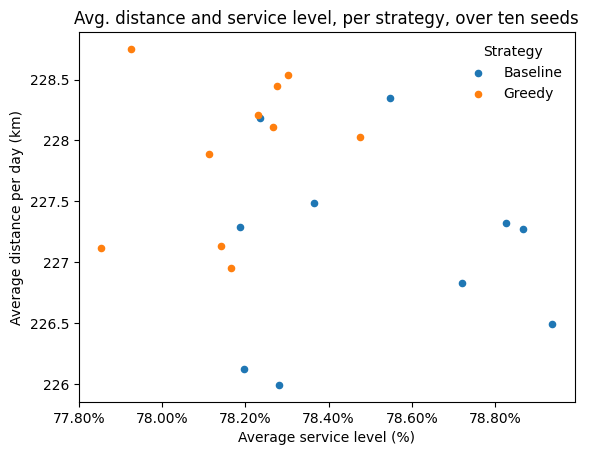

In [6]:
_, ax = plt.subplots()

baseline.plot.scatter(
    x="avg_service_level",
    y="avg_distance_per_day", 
    ax=ax,
    label="Baseline",
    color="tab:blue"
)

greedy.plot.scatter(
    x="avg_service_level",
    y="avg_distance_per_day",
    ax=ax,
    label="Greedy",
    color="tab:orange"
)

ticks = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(x / 1_000))
ax.yaxis.set_major_formatter(ticks)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

ax.legend(frameon=False, title="Strategy")
ax.set_title("Avg. distance and service level, per strategy, over ten seeds")
ax.set_xlabel("Average service level (%)")
ax.set_ylabel("Average distance per day (km)");
